In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import json
import os
from sklearn import linear_model

from scipy.stats import linregress
import scipy.stats as stats

In [2]:
master_df = pd.read_csv("Output/master_data.csv")
master_df.head()

,Postcode,House,Semi-detached,Apartment,Other dwelling,"No bedrooms (studios, etc)",1 bedroom,2 bedrooms,3 bedrooms,4 bedrooms,...,6 or more bedrooms,Couple with no children,Couple with children,One parent with children,Other family,Sole person household,Group household,People with Mental Health Conditions,Total People,State
0,800,43,5,5948,3,172,1856,3749,2805,168,...,6,2874,1181,395,134,3420,910,344,7149,7: Northern Territory
1,810,22676,2704,5969,84,207,1768,8552,9360,5484,...,311,6553,8881,2893,425,6996,1737,1971,34330,7: Northern Territory
2,812,14511,1087,1525,121,67,448,3389,6590,2353,...,95,3237,4486,2032,204,3249,592,1076,18634,7: Northern Territory
3,820,7317,3466,7171,96,167,1463,7566,7580,2372,...,168,5792,4755,1644,220,5987,1843,1112,19920,7: Northern Territory
4,822,20976,1426,194,426,216,873,3083,4392,1811,...,183,2456,4369,1989,404,1921,268,755,25304,7: Northern Territory


In [4]:
com_master_df = master_df.drop(master_df[master_df["Total People"]<10000].index, inplace=False )
com_master_df

,Postcode,House,Semi-detached,Apartment,Other dwelling,"No bedrooms (studios, etc)",1 bedroom,2 bedrooms,3 bedrooms,4 bedrooms,...,6 or more bedrooms,Couple with no children,Couple with children,One parent with children,Other family,Sole person household,Group household,People with Mental Health Conditions,Total People,State
1,810,22676,2704,5969,84,207,1768,8552,9360,5484,...,311,6553,8881,2893,425,6996,1737,1971,34330,7: Northern Territory
2,812,14511,1087,1525,121,67,448,3389,6590,2353,...,95,3237,4486,2032,204,3249,592,1076,18634,7: Northern Territory
3,820,7317,3466,7171,96,167,1463,7566,7580,2372,...,168,5792,4755,1644,220,5987,1843,1112,19920,7: Northern Territory
4,822,20976,1426,194,426,216,873,3083,4392,1811,...,183,2456,4369,1989,404,1921,268,755,25304,7: Northern Territory
7,830,13738,901,1810,15,25,805,2765,6391,2944,...,90,3080,4275,2193,157,3537,566,1302,18501,7: Northern Territory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,7250,41413,2761,3246,118,116,2567,10629,19927,8506,...,321,12187,10649,5302,400,14883,1537,5821,51133,6: Tasmania
2626,7307,10194,397,69,95,36,317,2029,5101,1720,...,52,3468,2268,928,93,2762,196,1153,11849,6: Tasmania
2627,7310,24655,1802,48,179,87,1244,5300,12894,3844,...,166,7001,5360,3261,245,8145,755,3536,28635,6: Tasmania
2628,7315,13382,845,30,161,31,725,2753,6894,2374,...,65,4191,2983,1592,117,4439,238,1658,15635,6: Tasmania


In [5]:
com_master_df["People with Mental Health %"]=round(com_master_df["People with Mental Health Conditions"]/com_master_df["Total People"]*100,1)
com_master_df.head()

,Postcode,House,Semi-detached,Apartment,Other dwelling,"No bedrooms (studios, etc)",1 bedroom,2 bedrooms,3 bedrooms,4 bedrooms,...,Couple with no children,Couple with children,One parent with children,Other family,Sole person household,Group household,People with Mental Health Conditions,Total People,State,People with Mental Health %
1,810,22676,2704,5969,84,207,1768,8552,9360,5484,...,6553,8881,2893,425,6996,1737,1971,34330,7: Northern Territory,5.7
2,812,14511,1087,1525,121,67,448,3389,6590,2353,...,3237,4486,2032,204,3249,592,1076,18634,7: Northern Territory,5.8
3,820,7317,3466,7171,96,167,1463,7566,7580,2372,...,5792,4755,1644,220,5987,1843,1112,19920,7: Northern Territory,5.6
4,822,20976,1426,194,426,216,873,3083,4392,1811,...,2456,4369,1989,404,1921,268,755,25304,7: Northern Territory,3.0
7,830,13738,901,1810,15,25,805,2765,6391,2944,...,3080,4275,2193,157,3537,566,1302,18501,7: Northern Territory,7.0


In [6]:
com_master_df.columns

Index(['Postcode', 'House', 'Semi-detached', 'Apartment', 'Other dwelling',
       'No bedrooms (studios, etc)', '1 bedroom', '2 bedrooms', '3 bedrooms',
       '4 bedrooms', '5 bedrooms', '6 or more bedrooms',
       'Couple with no children', 'Couple with children',
       'One parent with children', 'Other family', 'Sole person household',
       'Group household', 'People with Mental Health Conditions',
       'Total People', 'State', 'People with Mental Health %'],
      dtype='object')

In [7]:
com_master_df['Small House- 1 or 2 Bedrooms'] = (com_master_df['1 bedroom'] + com_master_df['2 bedrooms'])
com_master_df['Medium House- 3, 4 or 5 Bedrooms'] = (com_master_df['3 bedrooms']+ com_master_df['4 bedrooms']+com_master_df['5 bedrooms'])

com_master_df =com_master_df.drop(['1 bedroom','2 bedrooms','3 bedrooms','4 bedrooms','5 bedrooms'],axis=1)
House_Size_df=com_master_df.filter(['Postcode','No bedrooms (studios, etc)',
                             'Small House- 1 or 2 Bedrooms',
                             'Medium House- 3, 4 or 5 Bedrooms',
                             '6 or more bedrooms',
                            'People with Mental Health Conditions',
                            'People with Mental Health %',
                            'Total People'],axis=1)
House_Size_df.head()

,Postcode,"No bedrooms (studios, etc)",Small House- 1 or 2 Bedrooms,"Medium House- 3, 4 or 5 Bedrooms",6 or more bedrooms,People with Mental Health Conditions,People with Mental Health %,Total People
1,810,207,10320,16104,311,1971,5.7,34330
2,812,67,3837,9486,95,1076,5.8,18634
3,820,167,9029,10544,168,1112,5.6,19920
4,822,216,3956,6547,183,755,3.0,25304
7,830,25,3570,9771,90,1302,7.0,18501


In [8]:
House_Size_df.describe()

,Postcode,"No bedrooms (studios, etc)",Small House- 1 or 2 Bedrooms,"Medium House- 3, 4 or 5 Bedrooms",6 or more bedrooms,People with Mental Health Conditions,People with Mental Health %,Total People
count,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000
mean,3663.730047,110.360329,6144.252347,13853.076291,213.774648,2148.166667,8.798709,24656.708920
std,1393.494131,262.220385,6114.247706,9384.096028,183.252283,1487.081845,2.563490,15678.245193
min,810.000000,0.000000,66.000000,2428.000000,0.000000,330.000000,2.200000,10043.000000
25%,2496.750000,18.000000,2229.750000,7684.000000,90.000000,1181.750000,6.900000,14383.000000
50%,3190.500000,45.000000,4006.000000,10899.500000,162.000000,1679.500000,8.700000,19725.000000
75%,4573.500000,112.000000,8041.000000,16577.750000,276.750000,2575.250000,10.700000,29895.500000
max,7320.000000,4492.000000,56477.000000,72411.000000,1363.000000,13409.000000,16.300000,129888.000000


In [9]:
com_master_df['Family Household'] = (com_master_df['Couple with no children'] + com_master_df['Couple with children']+ com_master_df['Other family']+ com_master_df['Group household'])

#com_master_df =com_master_df.drop(['1 bedroom','2 bedrooms','3 bedrooms','4 bedrooms','5 bedrooms'],axis=1)
Household_df=com_master_df.filter(['Postcode',
                                   'Sole person household',
                                 'One parent with children',
                                 'Family Household',
                                'People with Mental Health Conditions',
                                'People with Mental Health %',
                                'Total People'],axis=1)
Household_df.head()

,Postcode,Sole person household,One parent with children,Family Household,People with Mental Health Conditions,People with Mental Health %,Total People
1,810,6996,2893,17596,1971,5.7,34330
2,812,3249,2032,8519,1076,5.8,18634
3,820,5987,1644,12610,1112,5.6,19920
4,822,1921,1989,7497,755,3.0,25304
7,830,3537,2193,8078,1302,7.0,18501


In [10]:
#Finding the Weightage of each House Type based on No.of Bedrooms

model = linear_model.LinearRegression()
X,y = House_Size_df[['No bedrooms (studios, etc)','Small House- 1 or 2 Bedrooms','Medium House- 3, 4 or 5 Bedrooms','6 or more bedrooms']].values, House_Size_df['People with Mental Health Conditions'].values

model.fit(X,y)      
model.coef_

array([ 0.20763422,  0.03985162,  0.14424612, -0.63349393])

In [11]:
# Finding R Value
yhat = model.predict(X)
SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(r_squared, adjusted_r_squared)

print(model.score(X, y), 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

#Findind the R Value from the R Squared
r_squared**(1/2)

0.812911183242311 0.8120276469175994
0.8129111832423112 0.8120276469175995


0.9016158734418506

In [12]:
No_bedrooms =House_Size_df['No bedrooms (studios, etc)']
Small_House=House_Size_df['Small House- 1 or 2 Bedrooms']
Medium_House=House_Size_df['Medium House- 3, 4 or 5 Bedrooms']
Large_House=House_Size_df['6 or more bedrooms']
Mental_Health=House_Size_df['People with Mental Health Conditions']

In [13]:
# Perform a linear regression on Mental Health versus Houses with No Bedrooms
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(Mental_Health, No_bedrooms)

# Create equation of line to calculate predicted Mental Health rate
vc_fit = vc_slope * Mental_Health + vc_int

The r-value is:0.08931509836931725


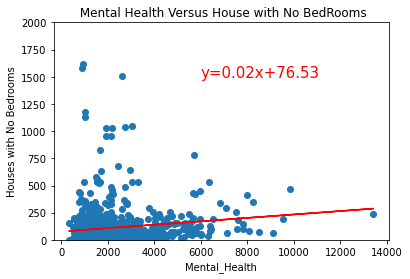

In [14]:
#Scatter Plot for Mental Health Versus House with No BedRooms

plt.scatter(Mental_Health, No_bedrooms)
plt.plot(Mental_Health,vc_fit,color='red')
plt.title(' Mental Health Versus House with No BedRooms')
plt.xlabel('Mental_Health')
plt.ylabel('Houses with No Bedrooms')
plt.ylim(0,2000)


print(f"The r-value is:"+str(vc_r))

plt.text(6000,1500,"y="+str(round(vc_slope,2))+"x+"+str(round(vc_int,2)), fontsize=15, color="red")

plt.show()

In [15]:
# Perform a linear regression on Mental Health versus Houses with 1 or 2 Bedrooms
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(Mental_Health, Small_House)

# Create equation of line to calculate predicted Mental Health rate
vc_fit = vc_slope * Mental_Health + vc_int

The r-value is:0.2979025407999754


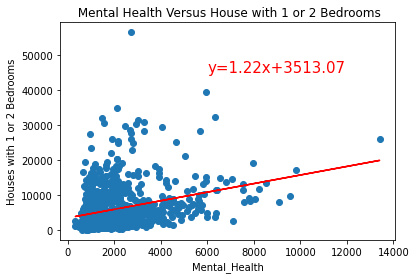

In [16]:
#Scatter Plot for Mental Health Versus House with 1 or 2 Bedrooms

plt.scatter(Mental_Health,Small_House)
plt.plot(Mental_Health,vc_fit,color='red')
plt.title(' Mental Health Versus House with 1 or 2 Bedrooms')
plt.xlabel('Mental_Health')
plt.ylabel('Houses with 1 or 2 Bedrooms')
#plt.ylim(0,2000)


print(f"The r-value is:"+str(vc_r))

plt.text(6000,45000,"y="+str(round(vc_slope,2))+"x+"+str(round(vc_int,2)), fontsize=15, color="red")

plt.show()

In [17]:
# Perform a linear regression on Mental Health versus Houses with 3, 4 or 5 Bedrooms
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(Mental_Health, Medium_House)

# Create equation of line to calculate predicted Mental Health rate
vc_fit = vc_slope * Mental_Health + vc_int

The r-value is:0.8810178979714295


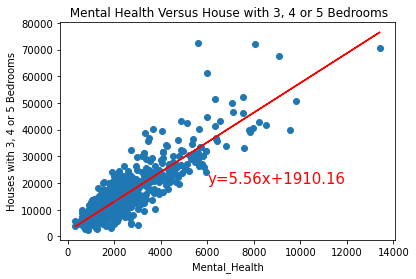

In [18]:
#Scatter Plot for Mental Health Versus House with 3, 4 or 5 Bedrooms

plt.scatter(Mental_Health,Medium_House)
plt.plot(Mental_Health,vc_fit,color='red')
plt.title(' Mental Health Versus House with 3, 4 or 5 Bedrooms')
plt.xlabel('Mental_Health')
plt.ylabel('Houses with 3, 4 or 5 Bedrooms')
#plt.ylim(0,2000)


print(f"The r-value is:"+str(vc_r))

plt.text(6000,20000,"y="+str(round(vc_slope,2))+"x+"+str(round(vc_int,2)), fontsize=15, color="red")

plt.show()

In [19]:
# Perform a linear regression on Mental Health versus Houses with 6 or more bedrooms
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(Mental_Health, Large_House)

# Create equation of line to calculate predicted Mental Health rate
vc_fit = vc_slope * Mental_Health + vc_int

The r-value is:0.526733634940465


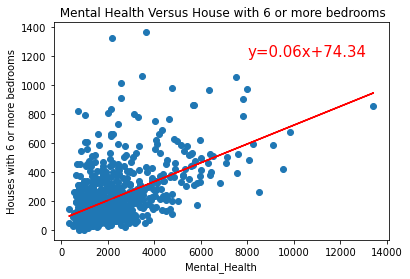

In [20]:
#Scatter Plot for Mental Health Versus House with 6 or more bedrooms

plt.scatter(Mental_Health, Large_House)
plt.plot(Mental_Health,vc_fit,color='red')
plt.title(' Mental Health Versus House with 6 or more bedrooms')
plt.xlabel('Mental_Health')
plt.ylabel('Houses with 6 or more bedrooms')
#plt.ylim(0,2000)


print(f"The r-value is:"+str(vc_r))

plt.text(8000,1200,"y="+str(round(vc_slope,2))+"x+"+str(round(vc_int,2)), fontsize=15, color="red")

plt.show()

In [77]:
#Finding the Weightage of each House Type based on No.of Persons in the Household

model = linear_model.LinearRegression()
X,y = Household_df[['Sole person household','One parent with children','Family Household']].values, Household_df['People with Mental Health Conditions'].values

model.fit(X,y)      
model.coef_

array([ 0.09877298,  0.6651111 , -0.00402074])

In [22]:
Sole_Person=Household_df['Sole person household']
Single_Parent=Household_df['One parent with children']
Family=Household_df['Family Household']

In [23]:
# Perform a linear regression on Mental Health versus Sole Person Household
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(Mental_Health, Sole_Person)

# Create equation of line to calculate predicted Mental Health rate
vc_fit = vc_slope * Mental_Health + vc_int

The r-value is:0.7270003455524409


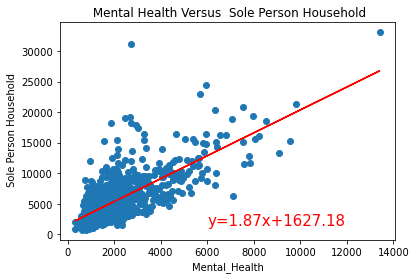

In [24]:
#Scatter Plot for Mental Health Versus  Sole Person Household

plt.scatter(Mental_Health, Sole_Person)
plt.plot(Mental_Health,vc_fit,color='red')
plt.title(' Mental Health Versus  Sole Person Household')
plt.xlabel('Mental_Health')
plt.ylabel(' Sole Person Household')
#plt.ylim(0,2000)


print(f"The r-value is:"+str(vc_r))

plt.text(6000,1500,"y="+str(round(vc_slope,2))+"x+"+str(round(vc_int,2)), fontsize=15, color="red")

plt.show()

In [25]:
# Perform a linear regression on Mental Health versus Single Parent Hosehold
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(Mental_Health, Single_Parent)

# Create equation of line to calculate predicted Mental Health rate
vc_fit = vc_slope * Mental_Health + vc_int

The r-value is:0.8825362738567322


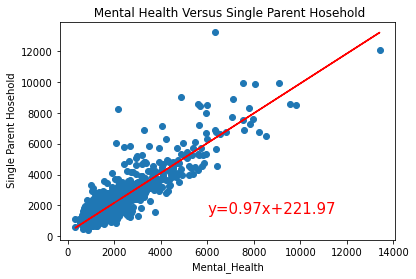

In [26]:
#Scatter Plot for Mental Health Versus Single Parent Hosehold

plt.scatter(Mental_Health, Single_Parent)
plt.plot(Mental_Health,vc_fit,color='red')
plt.title(' Mental Health Versus Single Parent Hosehold')
plt.xlabel('Mental_Health')
plt.ylabel(' Single Parent Hosehold')
#plt.ylim(0,2000)


print(f"The r-value is:"+str(vc_r))

plt.text(6000,1500,"y="+str(round(vc_slope,2))+"x+"+str(round(vc_int,2)), fontsize=15, color="red")

plt.show()

In [27]:
# Perform a linear regression on Mental Health versus Family Hosehold
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(Mental_Health, Family)

# Create equation of line to calculate predicted Mental Health rate
vc_fit = vc_slope * Mental_Health + vc_int

The r-value is:0.8048954636820536


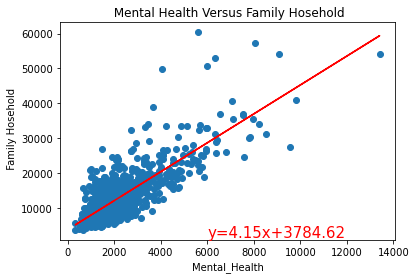

In [28]:
#Scatter Plot for Mental Health Versus Family Hosehold

plt.scatter(Mental_Health, Family)
plt.plot(Mental_Health,vc_fit,color='red')
plt.title(' Mental Health Versus Family Hosehold')
plt.xlabel('Mental_Health')
plt.ylabel('  Family Hosehold')
#plt.ylim(0,2000)


print(f"The r-value is:"+str(vc_r))

plt.text(6000,1500,"y="+str(round(vc_slope,2))+"x+"+str(round(vc_int,2)), fontsize=15, color="red")

plt.show()